

##### tags: `Project` `Machine Learning`

- **Location:** 12 Ton Dan, Dist 4, HCMC
- **Date:** Agust 19, 2019 10:00 AM (GMT+7)
**Team Member:**
    - Mr. Hoa (Coder)
      Contact:  <hoahh2201@gmail.com>

    - Mr. Tu  (Coder)
Contact:  <tu.hanh.nguyen@outlook.com>

##  Brief Information

![](https://i.imgur.com/fgoQ6dz.png)

Source: https://www.kaggle.com/c/dogs-vs-cats

The Challenge is to classify dog or cat images. Our team do it with L-layer neural network in Python, then compare it with the result from sklearn library to understand the model.

##  Data Description

The training set contain 5,000 images of dogs and cats. While the test set have 500 images.

![](https://i.imgur.com/1CCyzYe.png)

# MLE-5-Weekly Project




In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score
np.random.seed(1) # set a seed so that the results are consistent

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Load the data from h5 file
def load_dataset():
#     train_dataset = h5py.File('/content/gdrive/My Drive/CoderSchool-FTMLE/data/datasets/catdog/catsvsdogs-train.h5', "r")
    train_dataset = h5py.File('./catsvsdogs-train.h5', "r")

    train_set_x_orig = np.array(train_dataset["images"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["labels"][:]) # your train set labels
    
#     test_dataset = h5py.File('/content/gdrive/My Drive/CoderSchool-FTMLE/data/datasets/catdog/catsvsdogs-test.h5', "r")
    test_dataset = h5py.File('./catsvsdogs-test.h5', "r")
    test_set_x_orig = np.array(test_dataset["images"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["labels"][:]) # your test set labels
    

    
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [4]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig = load_dataset()

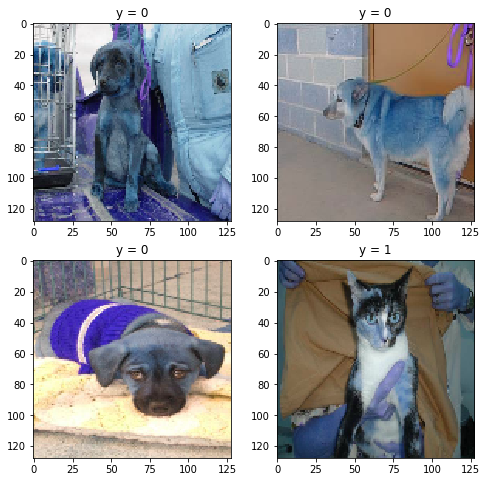

In [5]:
# Some some random images and their labels
plt.subplots(figsize = (8,8))
plt.subplot(221)
index_1 = np.random.randint(0,len(train_set_x_orig)) 
plt.imshow(train_set_x_orig[index_1])
plt.title("y = " + str(train_set_y_orig[index_1]))

plt.subplot(222)
index_2 = np.random.randint(0,len(train_set_x_orig))
plt.imshow(train_set_x_orig[index_2])
plt.title("y = " + str(train_set_y_orig[index_2]))

plt.subplot(223)
index_3 = np.random.randint(0,len(train_set_x_orig))
plt.imshow(train_set_x_orig[index_3])
plt.title("y = " + str(train_set_y_orig[index_3]))

plt.subplot(224)
index_4 = np.random.randint(0,len(train_set_x_orig))
plt.imshow(train_set_x_orig[index_4])
plt.title("y = " + str(train_set_y_orig[index_4]))

plt.show()

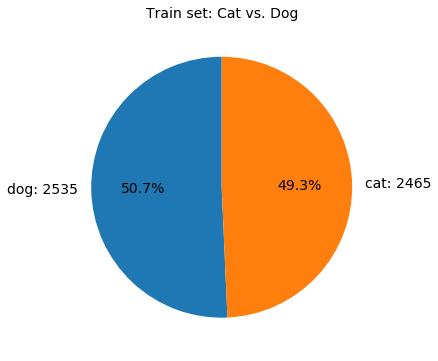

In [6]:
# Visualization the train set labels
unique, counts = np.unique(train_set_y_orig, return_counts = True)
dict1 = dict(zip(unique, counts))
plt.figure(figsize=(6,6))
plt.pie(x = counts, labels = ['dog: %s' % counts[0],'cat: %s' % counts[1]], autopct = '%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Train set: Cat vs. Dog', fontdict={'fontsize': 14})
plt.show()

In [7]:
# Convert X to 2D array
X_train = train_set_x_orig.flatten().reshape((len(train_set_x_orig),-1)) / 255
X_test = test_set_x_orig.flatten().reshape((len(test_set_x_orig),-1)) / 255

# Convert y to 1D array
y_train = train_set_y_orig.reshape(1, -1)
y_test = test_set_y_orig.reshape(1, -1)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5000, 49152), (1, 5000), (500, 49152), (1, 500))

## Building model

In this notebook, you will implement all the functions required to build a deep neural network.

![](https://i.imgur.com/ivhZhmx.png)

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).
    
The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_params`, you should make sure that your dimensions match between each layer. Given $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

| |**Shape of W**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |**Shape of b**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|**Activation**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|**Shape of Activation**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|:-|:-|:-|:-|:-|
|**Layer 1**|$(n^{[1]},12288)$|$(n^{[1]},1)$|$Z^{[1]} = W^{[1]}  X + b^{[1]} $|$(n^{[1]},209)$|
| **Layer 2**|$(n^{[2]}, n^{[1]})$|$(n^{[2]},1)$|$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$|$(n^{[2]}, 209)$|
|$\vdots$| $\vdots$ | $\vdots$|$\vdots$|$\vdots$|
|**Layer L-1** | $(n^{[L-1]}, n^{[L-2]})$ | $(n^{[L-1]}, 1)$ | $Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ | $(n^{[L-1]}, 209)$|
|**Layer L** | $(n^{[L]}, n^{[L-1]})$ | $(n^{[L]}, 1)$|  $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$|$(n^{[L]}, 209)$ |

Remember that when we compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}$$

**Mathematical expression of the algorithm**:

![](https://i.imgur.com/FPjpVDX.png)

**Foward propagation:**

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$

where $A^{[0]} = X^T$. And the activation functions:

$$A = RELU(Z) = max(0, Z)$$
$$A^{[L]} = sigmoid(Z^{[L]})$$

**Cost function**

$$J = -\frac1m\sum \bigg( Y \odot log(A^{[L]}) + (1-Y) \odot log(1-A^{[L]}) \bigg)$$

> Note that $\odot$ denotes elementwise multiplication.

**Backward propagation**

The three outputs $(dZ^{[l]}, dW^{[l]}, db^{[l]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:

$$dZ^{[l]} =   W^{[l+1]^T}dZ^{[l+1]} \odot g^{[l]'}(Z^{[l]})$$
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$




#Neural network 1 layer

## Building model

We are going to train a Neural Network with a single hidden layer

<img src="https://i.imgur.com/5EHSfO6.png" alt="cat-noncat" width="75%"/>

**Mathematical expression of the algorithm**:

For $i^{th}$ example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost function $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

The general methodology to build a Neural Network is to:

    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

Define three variables:

    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
def relu(Z):
    return np.maximum(0, Z)

In [11]:
def relu_backward(Z):
    temp = np.ones(Z.shape)
    temp[Z<0] = 0
    return temp

In [12]:
def layer_sizes(X, Y, n_h):
    n_x = X.shape[1]
    n_h = n_h
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

n_x, n_h, n_y = layer_sizes(X_train, y_train, 4)

In [13]:
def initialize_params(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) / np.sqrt(n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape==(n_h, n_x))
    assert (W2.shape==(n_y, n_h))
    assert (b1.shape==(n_h, 1))
    assert (b2.shape==(n_y, 1))
    
    parameters = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }
    
    return parameters

In [14]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X.T) + b1
    
    # Use tanh as activate function
    # A1 = np.tanh(Z1)
    
    #Use Relu
    A1 = relu(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    m = X.shape[0]
    assert (A2.shape==(1,m))
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    
    return A2, cache


In [15]:
def compute_cross_entropy_cost(A2, Y, parameters):
    m = Y.shape[1]
    
    loss = np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2))
    J = (-1/m) * np.sum(loss)
    J = np.squeeze(J) # np.squeeze([24]) => 24
    
    return J

### Summary of backward propagation

$dZ^{[2]}= (A^{[2]} -Y)$

$dW^{[2]} = \frac{1}{m} dZ^{[2]}A^{[1]^T} $

$db^{[2]} = \frac{1}{m}np.sum(dZ^{[2]}, axis=1, keepdims=True)$

$dZ^{[1]} =   W^{[2]^T}dZ^{[2]} \odot g^{[1]'}(Z^{[1]})$

$dW^{[1]} = \frac1mdZ^{[1]}X$

$db^{[1]} = \frac{1}{m}np.sum(dZ^{[1]}, axis=1, keepdims=True)$

> Note that $\odot$ denotes elementwise multiplication.

> The notation you will use is common in deep learning coding:
>    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
>    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
>    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
>    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$

> To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - A1**2)`.

In [16]:
def backward_propagation(X, Y, parameters, cache):
    
    m = X.shape[0]
    
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    # tanh as activate function
    # dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - A1**2))
    
    # Relu as activate function
    dZ1 = np.multiply(np.dot(W2.T, dZ2), relu_backward(Z1))
    
    dW1 = (1/m)*np.dot(dZ1, X)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1":dW1,
        "dW2":dW2,
        "db1":db1,
        "db2":db2
    }
    
    return grads

In [17]:
def update_parameters(parameters, grads, learning_rate):
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parameters = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }
    
    return parameters

### Build our neural network in `nn_model()`

In [18]:
def nn_model(X, Y, n_h, iterations, learning_rate):
    n_x, n_h, n_y = layer_sizes(X, Y, n_h)
    
    parameters = initialize_params(n_x, n_h, n_y)
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    costs = []
    test_errors = []
    
    for i in range(iterations):
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        # Calculate cost
        J = compute_cross_entropy_cost(A2, Y, parameters)
        # Backward propagation
        grads = backward_propagation(X, Y, parameters, cache)
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print('Iteration %i, Cost: %f' % (i, J))
            costs.append(J)
            A2_test, _ = forward_propagation(X_test, parameters)
            predictions = A2_test > 0.5
            test_errors.append(1 - accuracy_score(y_test[0], predictions[0]))
            
            
    # plot the cost
    fig, ax = plt.subplots(figsize=(6,8))
    plt.plot(costs)
    plt.plot(test_errors, c='r')
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
            

In [19]:
def predict(X, parameters):
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    return predictions, A2

Iteration 0, Cost: 0.700231
Iteration 100, Cost: 0.675954
Iteration 200, Cost: 0.667411
Iteration 300, Cost: 0.660459
Iteration 400, Cost: 0.654459
Iteration 500, Cost: 0.646015
Iteration 600, Cost: 0.637294
Iteration 700, Cost: 0.630853
Iteration 800, Cost: 0.625960
Iteration 900, Cost: 0.621073
Iteration 1000, Cost: 0.617597
Iteration 1100, Cost: 0.612710
Iteration 1200, Cost: 0.609363
Iteration 1300, Cost: 0.605646
Iteration 1400, Cost: 0.602344
Iteration 1500, Cost: 0.598956
Iteration 1600, Cost: 0.596592
Iteration 1700, Cost: 0.591471
Iteration 1800, Cost: 0.588632
Iteration 1900, Cost: 0.588323
Iteration 2000, Cost: 0.583942
Iteration 2100, Cost: 0.581065
Iteration 2200, Cost: 0.579882


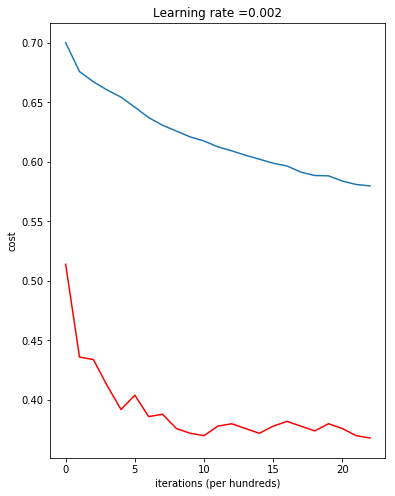

In [26]:
parameters = nn_model(X_train, y_train, n_h=7, iterations=2300, learning_rate=0.002)

predictions, A2 = predict(X_test, parameters)

In [27]:
predictions, A2 = predict(X_train, parameters)
print("Accuracy Score - Training set: %f" % accuracy_score(y_train[0], predictions[0]))
print("Confusion Matrix:")
print(confusion_matrix(y_train[0], predictions[0]))

Accuracy Score - Training set: 0.684400
Confusion Matrix:
[[2261  274]
 [1304 1161]]


In [28]:
predictions, A2 = predict(X_test, parameters)

print("Accuracy Score: %f" % accuracy_score(y_test[0], predictions[0]))
print("Confusion Matrix:")
print(confusion_matrix(y_test[0], predictions[0]))

Accuracy Score: 0.596000
Confusion Matrix:
[[202  53]
 [149  96]]


# Deep neural network L-layers

In [29]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [30]:
def relu(Z):
    return np.maximum(0, Z)

In [31]:
def relu_backward(Z):
    temp = np.ones(Z.shape)
    temp[Z<0] = 0
    return temp

In [32]:
def layer_sizes(X, Y, hiden_layers):
    layer_dims = np.array(hiden_layers, copy = True)
    
    n_x = X.shape[1]
    n_y = Y.shape[0]

    layer_dims = np.insert(layer_dims, 0, n_x)
    layer_dims = np.append(layer_dims, n_y)
    return layer_dims

layer_sizes(X_train, y_train, [20, 5, 7])

array([49152,    20,     5,     7,     1])

In [33]:
def initialize_params(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for i in range(1, L):

      parameters['W' + str(i)] = (np.random.randn(layer_dims[i],layer_dims[i-1]) / np.sqrt(layer_dims[i-1]))
      parameters['b' + str(i)] = np.zeros((layer_dims[i], 1))

    return parameters

In [34]:
def forward_propagation(X, parameters):
    caches = {}
    A_prev = X.T
    L = len(parameters) // 2

    for i in range(1, L):
      Wi = parameters['W' + str(i)]
      bi = parameters['b' + str(i)]

      Zi = np.dot(Wi, A_prev) + bi
      Ai = relu(Zi)
      
      caches['A' + str(i)] = Ai
      caches['Z' + str(i)] = Zi
      A_prev = Ai

      
    #last layer
    W_last = parameters['W' + str(L)]
    b_last = parameters['b' + str(L)]

    Z_last = np.dot(W_last, A_prev) + b_last
    A_last = sigmoid(Z_last)

    caches['A' + str(L)] = A_last
    caches['Z' + str(L)] = Z_last

    A_last = sigmoid(Z_last)
    return A_last, caches


In [35]:
def compute_cross_entropy_cost(A_last, Y):
    m = Y.shape[1]
    #A_last = A_prev
    
    loss = np.multiply(Y, np.log(A_last)) + np.multiply(1-Y, np.log(1-A_last))
    J = (-1/m) * np.sum(loss)
    J = np.squeeze(J) # np.squeeze([24]) => 24
    
    return J

In [36]:
def backward_propagation(X, Y, parameters, caches):
    
    m = X.shape[0]
    L = len(parameters) // 2 

    grads = {}
    A_last_prev = caches['A' + str(L-1)]
    A_last = caches['A' + str(L)]
    

    
    dZ_last = A_last - Y
    dw_last = (1/m)*np.dot(dZ_last, A_last_prev.T)
    db_last = (1/m) * np.sum(dZ_last, axis=1, keepdims=True)
    
    
    grads['dZ' + str(L)] = dZ_last
    grads['dW' + str(L)] = dw_last
    grads['db' + str(L)] = db_last
  
 
    for i in range(L-1, 0, -1):
      W_next = parameters['W' + str(i+1)]
      dZ_next=grads['dZ' + str(i+1)]
      Zi = caches['Z' + str(i)]
      Ai_prev = caches['A' +str(i-1)] if i>1 else X.T
      
      dZi = np.multiply(np.dot(W_next.T, dZ_next), relu_backward(Zi))
      dWi = (1/m)*np.dot(dZi, Ai_prev.T)
      dbi = (1/m)*np.sum(dZi, axis=1, keepdims=True)
      
      
     
      grads['dZ' + str(i)] = dZi
      grads['dW' + str(i)] = dWi
      grads['db' + str(i)] = dbi
      

    return grads

In [37]:
def update_parameters(parameters, grads, learning_rate):
    
  
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for i in range(1, L):

        parameters["W" + str(i)] -= learning_rate * grads["dW" + str(i)]
        parameters["b" + str(i)] -= learning_rate * grads["db" + str(i)]
        
    
    return parameters

### Build our neural network in `dnn_model()`

In [38]:
def dnn_model(X, Y, hiden_layers, iterations, learning_rate):

    layer_dims = layer_sizes(X, Y, hiden_layers)
    
    costs = []
    test_errors = []
    parameters = initialize_params(layer_dims)
    for i in range(iterations):
        # Forward propagation
        A_last, caches = forward_propagation(X, parameters)
        # Calculate cost
        J = compute_cross_entropy_cost(A_last, Y)
        # Backward propagation
        grads = backward_propagation(X, Y, parameters, caches)
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print('Iteration %i, Cost: %f' % (i, J))
            costs.append(J)
            A2_test, _ = forward_propagation(X_test, parameters)
            predictions = A2_test > 0.5
            test_errors.append(1 - accuracy_score(y_test[0], predictions[0]))
            
            
    # plot the cost
    fig, ax = plt.subplots(figsize=(6,8))
    plt.plot(costs)
    plt.plot(test_errors, c='r')
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
            

In [39]:
def predict(X, parameters):
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    return predictions

Iteration 0, Cost: 0.694310
Iteration 100, Cost: 0.675264
Iteration 200, Cost: 0.666132
Iteration 300, Cost: 0.657872
Iteration 400, Cost: 0.651918
Iteration 500, Cost: 0.647012
Iteration 600, Cost: 0.641235
Iteration 700, Cost: 0.638206
Iteration 800, Cost: 0.634614
Iteration 900, Cost: 0.630416
Iteration 1000, Cost: 0.626628
Iteration 1100, Cost: 0.622833
Iteration 1200, Cost: 0.617976
Iteration 1300, Cost: 0.616147
Iteration 1400, Cost: 0.612449
Iteration 1500, Cost: 0.609336
Iteration 1600, Cost: 0.605867
Iteration 1700, Cost: 0.602929
Iteration 1800, Cost: 0.600563
Iteration 1900, Cost: 0.593260
Iteration 2000, Cost: 0.593503
Iteration 2100, Cost: 0.588792
Iteration 2200, Cost: 0.586761
Iteration 2300, Cost: 0.583334
Iteration 2400, Cost: 0.580401
Iteration 2500, Cost: 0.576662
Iteration 2600, Cost: 0.575402
Iteration 2700, Cost: 0.569512
Iteration 2800, Cost: 0.566727
Iteration 2900, Cost: 0.562954
Iteration 3000, Cost: 0.562773
Iteration 3100, Cost: 0.558075
Iteration 3200, Cost

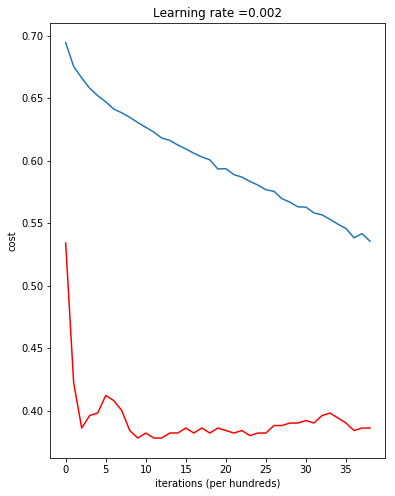

In [40]:

hiden_layers = [20, 7, 5, 3]
parameters= dnn_model(X_train, y_train, hiden_layers, iterations = 3900, learning_rate=0.002)

In [41]:
predictions= predict(X_train, parameters)
print("Accuracy Score - Training set: %f" % accuracy_score(y_train[0], predictions[0]))
print("Confusion Matrix:")
print(confusion_matrix(y_train[0], predictions[0]))

Accuracy Score - Training set: 0.732400
Confusion Matrix:
[[2324  211]
 [1127 1338]]


In [44]:
predictions = predict(X_test, parameters)

print("Accuracy Score: %f" % accuracy_score(y_test[0], predictions[0]))
print("Confusion Matrix:")
print(confusion_matrix(y_test[0], predictions[0]))

Accuracy Score: 0.626000
Confusion Matrix:
[[216  39]
 [148  97]]


# Model from sklearn

Try a sklearn model to solve the problem, let's see if your model can overpass it.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X_train, y_train[0])

# Show metrics
print("Accuracy Score: %f" % accuracy_score(y_test[0], lg.predict(X_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test[0], lg.predict(X_test)))

Accuracy Score: 0.576000
Confusion Matrix:
[[130 125]
 [ 87 158]]
